In [1]:
from IPython.display import Image
import os
import pandas as pd
from io import StringIO
import sys
import matplotlib.pyplot as plt

In [2]:

# log_file_path = '/content/training_logs.txt'  # Change the path as needed

# log_file = open(log_file_path, 'w')

# # Redirect stdout to the log file
# sys.stdout = log_file

In [3]:
with open('/content/drive/MyDrive/CUB_200_2011/images.txt', 'r') as f:
  images_text = f.read()

with open('/content/drive/MyDrive/CUB_200_2011/train_test_split.txt', 'r') as f:
  train_test = f.read()

with open('/content/drive/MyDrive/CUB_200_2011/image_class_labels.txt', 'r') as f:
  labels_text = f.read()

In [4]:

data_labels=pd.read_csv(StringIO(labels_text), sep=' ', header=None, names=['Number', 'Data'])
data_images=pd.read_csv(StringIO(images_text), sep=' ', header=None, names=['Number', 'Data'])
data_split=pd.read_csv(StringIO(train_test), sep=' ', header=None, names=['Number', 'Data'])

data_labels_column=data_labels['Data']
data_images_column=data_images['Data']
data_split_column=data_split['Data']

df=pd.DataFrame({
    'images':data_images_column,
    'labels': data_labels_column-1,
    'is_train': data_split_column
})

df

,images,labels,is_train
0,001.Black_footed_Albatross/Black_Footed_Albatr...,0,0
1,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1
2,001.Black_footed_Albatross/Black_Footed_Albatr...,0,0
3,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1
4,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1
...,...,...,...
11783,200.Common_Yellowthroat/Common_Yellowthroat_00...,199,1
11784,200.Common_Yellowthroat/Common_Yellowthroat_00...,199,0
11785,200.Common_Yellowthroat/Common_Yellowthroat_00...,199,0
11786,200.Common_Yellowthroat/Common_Yellowthroat_00...,199,1


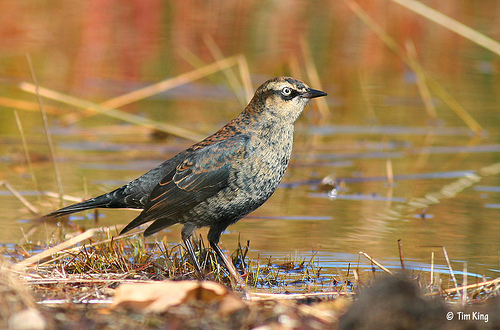

In [5]:
dir_path='/content/drive/MyDrive/CUB_200_2011/images/'

# images_path = '/content/drive/MyDrive/CUB_200_2011/images/005.Crested_Auklet/Crested_Auklet_0001_794941.jpg'

image_path=os.path.join(dir_path, df['images'][568])

Image(filename=image_path)

In [6]:
df_train = df[df['is_train']==1]
df_test = df[df['is_train']==0]

In [7]:
df_train

,images,labels,is_train
1,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1
3,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1
4,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1
6,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1
7,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1
...,...,...,...
11777,200.Common_Yellowthroat/Common_Yellowthroat_00...,199,1
11780,200.Common_Yellowthroat/Common_Yellowthroat_00...,199,1
11781,200.Common_Yellowthroat/Common_Yellowthroat_00...,199,1
11783,200.Common_Yellowthroat/Common_Yellowthroat_00...,199,1


In [8]:
for index, row in df_train.iterrows():
  print(f"index: {index} row: {row['images']}")

Streaming output truncated to the last 5000 lines.
index: 1879 row: 034.Gray_crowned_Rosy_Finch/Gray_Crowned_Rosy_Finch_0016_27181.jpg
index: 1880 row: 034.Gray_crowned_Rosy_Finch/Gray_Crowned_Rosy_Finch_0043_26990.jpg
index: 1882 row: 034.Gray_crowned_Rosy_Finch/Gray_Crowned_Rosy_Finch_0068_27196.jpg
index: 1885 row: 034.Gray_crowned_Rosy_Finch/Gray_Crowned_Rosy_Finch_0001_27211.jpg
index: 1888 row: 034.Gray_crowned_Rosy_Finch/Gray_Crowned_Rosy_Finch_0061_26979.jpg
index: 1891 row: 034.Gray_crowned_Rosy_Finch/Gray_Crowned_Rosy_Finch_0025_797274.jpg
index: 1894 row: 034.Gray_crowned_Rosy_Finch/Gray_Crowned_Rosy_Finch_0044_26976.jpg
index: 1896 row: 034.Gray_crowned_Rosy_Finch/Gray_Crowned_Rosy_Finch_0006_797284.jpg
index: 1897 row: 034.Gray_crowned_Rosy_Finch/Gray_Crowned_Rosy_Finch_0071_797285.jpg
index: 1898 row: 034.Gray_crowned_Rosy_Finch/Gray_Crowned_Rosy_Finch_0021_797286.jpg
index: 1902 row: 034.Gray_crowned_Rosy_Finch/Gray_Crowned_Rosy_Finch_0015_797291.jpg
index: 1903 row: 034

In [9]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os

class CustomImageDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list
        self.transform = transform

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        img_path, label = self.data_list[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label

train_data_list = []

for index, row in df_train.iterrows():
    # Assuming 'images' column contains the relative paths
    image_path = os.path.join(dir_path, row['images'])
    label = row['labels']
    train_data_list.append((image_path, label))

test_data_list = []

for index, row in df_test.iterrows():
    # Assuming 'images' column contains the relative paths
    image_path = os.path.join(dir_path, row['images'])
    label = row['labels']
    test_data_list.append((image_path, label))

# Define your transformations for training and testing
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create datasets using CustomImageDataset
train_dataset = CustomImageDataset(data_list=train_data_list, transform=train_transform)
test_dataset = CustomImageDataset(data_list=test_data_list, transform=test_transform)

# Create DataLoader for training and testing
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [10]:
# for batch_idx, (data, targets) in enumerate(train_dataloader):
#     print(f"Batch {batch_idx + 1} - Data Shape: {data.shape}, Targets Shape: {targets.shape}")
#     # Additional analysis or visualization if needed

In [11]:
# import matplotlib.pyplot as plt

# # Assuming single-channel images (grayscale)
# for inputs, labels in train_dataloader:
#     plt.hist(labels.numpy(), bins=len(train_dataloader.dataset.classes))
#     plt.title('Class Distribution')
#     plt.xlabel('Class')
#     plt.ylabel('Count')
#     plt.show()
#     break  # Only analyze the first batch for simplicity

In [12]:
# import matplotlib.pyplot as plt
# import torchvision.utils as vutils

# for inputs, labels in train_dataloader:
#     # Create a grid of images
#     img_grid = vutils.make_grid(inputs, nrow=8, normalize=True)
#     # Display the images
#     plt.imshow(img_grid.permute(1, 2, 0))
#     plt.axis('off')
#     plt.show()
#     break  # Only visualize the first batch for simplicity


In [13]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from torch import nn
device

device(type='cuda')

In [14]:
import torchvision
import torch.optim as optim
import torch.nn.functional as F

# import torchvision.datasets as datasets
import torchvision.transforms as transforms
from tqdm import tqdm

# Hyperparameters
num_classes = 200
learning_rate = 1e-3
batch_size = 64
num_epochs = 5


In [19]:
import torch
import torch.nn as nn

class ModifiedVGG16(nn.Module):
    def __init__(self, num_classes=200):
        super(ModifiedVGG16, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # nn.Conv2d(64, 128, kernel_size=3, padding=1),
            # nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            # nn.Conv2d(512, 512, kernel_size=3, padding=1),
            # nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            # nn.Conv2d(512, 512, kernel_size=3, padding=1),
            # nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Create an instance of the modified VGG16 model
modified_vgg16_model = ModifiedVGG16(num_classes=200)

modified_vgg16_model.to(device)

ModifiedVGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [20]:
# from torchvision import models

# model_ft = models.resnet18(weights='IMAGENET1K_V1')
# num_ftrs = model_ft.fc.in_features
# # Here the size of each output sample is set to 2.

# for param in model_ft.parameters():
#     param.requires_grad = False
# # Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
# model_ft.fc = nn.Linear(num_ftrs, num_classes)
# # Add Softmax activation
# # model_ft.softmax = nn.Softmax(dim=1)

# model_ft = model_ft.to(device)

In [21]:
print(modified_vgg16_model)


ModifiedVGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [22]:
from torchsummary import summary
summary(modified_vgg16_model, (3, 224, 224)) # device="cuda" if torch.cuda.is_available() else "cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
         MaxPool2d-8          [-1, 128, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         295,168
             ReLU-10          [-1, 256, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         590,080
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [37]:
# !pip install torchmetrics

In [ ]:
# from torchmetrics import CrossEntropyLoss
# criterion = CrossEntropyLoss(num_classes=num_classes)

In [41]:
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

# Set the model to training mode
modified_vgg16_model.train()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(modified_vgg16_model.parameters(), lr=0.001, momentum=0.9)

In [42]:
losses_per_epoch = []
accuracies_per_epoch = []

# Train Network
for epoch in range(num_epochs):
    losses = []
    correct_predictions = 0
    total_samples = 0

    for batch_idx, (data, targets) in enumerate(tqdm(train_dataloader)):

        data = data.to(device=device)
        targets = targets.to(device=device)

        scores = modified_vgg16_model(data)

        loss = criterion(scores, targets)

        losses.append(loss.item())
        # backward
        optimizer_ft.zero_grad()
        loss.backward()


        optimizer_ft.step()


        _, predicted_labels = torch.max(scores, 1)
        correct_predictions += (predicted_labels == targets).sum().item()
        total_samples += targets.size(0)

    # Calculate loss and accuracy for the epoch
    epoch_loss = sum(losses) / len(losses)
    epoch_accuracy = correct_predictions / total_samples

    # Append values to the lists
    losses_per_epoch.append(epoch_loss)
    accuracies_per_epoch.append(epoch_accuracy)

    print(f"Cost at epoch {epoch} is {sum(losses)/len(losses):.5f}")

# Plotting loss and accuracy
epochs = np.arange(1, num_epochs + 1)

# Plot Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, losses_per_epoch, label='Training Loss', marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracies_per_epoch, label='Training Accuracy', marker='o')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()




  4%|▍         | 4/94 [01:03<23:58, 15.98s/it]


KeyboardInterrupt: 

In [ ]:
# Check accuracy on training & test to see how good our model


def check_accuracy(loader, model):
    # if loader.dataset.train:
    #     print("Checking accuracy on training data")
    # else:
    #     print("Checking accuracy on test data")

    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        print(
            f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}"
        )

    model.train()


check_accuracy(train_dataloader, model_ft)

KeyboardInterrupt: 

In [ ]:
log_file.close()

# Restore the original stdout
sys.stdout = sys.__stdout__

# Extra Stuff

In [ ]:
from torchsummary import summary
summary(modified_vgg16_model, (3, 224, 224), device="cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modified_vgg16_model.parameters(), lr=learning_rate)

In [ ]:
import torch
from torchvision import models
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms

# Assuming you have loaded your dataset and created a DataLoader (train_dataloader)

# Define your transformations for training
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the pretrained model
model = models.efficientnet_b4(pretrained=True).cuda()

# Replace the classifier
classifier = nn.Sequential(
    nn.Linear(in_features=model.classifier[1].in_features, out_features=256, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=256, out_features=525, bias=True)
)
model.classifier = classifier

# Move the model to GPU
model = model.cuda()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5  # Adjust as needed
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs, labels in train_dataloader:
        inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    epoch_loss = running_loss / len(train_dataloader)
    epoch_accuracy = correct_predictions / total_samples

    print(f'Epoch {epoch + 1}/{num_epochs} - Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')


# Code form kaggle that might be useful

In [ ]:
from PIL import Image
import numpy as np
import os


# Function to calculate mean and std for image data
def calculate_mean_std(image_paths, percent):

    image_paths = image_paths.sample(frac=percent, random_state=42)
    # Initialize lists to store channel-wise means and stds
    channel_means = [0.0, 0.0, 0.0]
    channel_stds = [0.0, 0.0, 0.0]
    # Iterate through each image and accumulate pixel values
    for img_path in tqdm(image_paths):
        img = Image.open(img_path)
        img_array = np.array(img) / 255.0  # Normalize pixel values to be in the range [0, 1]

        # Accumulate mean and std for each channel
        for i in range(3):  # Assuming RGB images
            channel_means[i] += np.mean(img_array[:, :, i])
            channel_stds[i] += np.std(img_array[:, :, i])

    # Calculate average mean and std
    num_images = len(image_paths)
    mean = [c_mean / num_images for c_mean in channel_means]
    std = [c_std / num_images for c_std in channel_stds]

    return mean, std

mean, std = calculate_mean_std(data_train['path'], 0.9)
mean, std

In [ ]:
import torchvision.transforms as transform
import torchvision
transformer = transform.Compose([
                           transform.Resize((224, 224)),
                           transform.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                           transform.RandomRotation(5),
                           transform.RandomAffine(degrees=11, translate=(0.1,0.1), scale=(0.8,0.8)),
                           transform.ToTensor(),
                           transform.Normalize(mean,
                                               std)
])